In [162]:
import csv
import copy
import pandas
from pandas import DataFrame

# Loading Crash Data

Extract document id, crash date one hour range, municipality name, location type from csv file named "2022crashdata.csv" and store in the dictionary for further use

In [163]:
# process csv file function
def process_csv(filename):
        example_file = open(filename, encoding="utf-8")
        example_reader = csv.reader(example_file)
        example_data = list(example_reader)
        example_file.close()
        return example_data

In [164]:
#import csv file
new_file = process_csv("2022crashdata.csv")

In [165]:
#get_raw_data function will extract value from data and return a dictionary that stored the useful value
def get_raw_data(data):
    crash_dic = {
        'document_id': [],
        'crashdate': [],
        'ntfyhour': [],
        'muniname': [],
        'loctype': [],
        'injury_severity': [],
        'alcohol': [],
        'speed': [],
        'total_injury': []
    }
    for i in range(len(data)):
        crash_dic['document_id'].append(data[i][0])       # DOCTNMBR
        crash_dic['crashdate'].append(data[i][2])         # CRSHDATE
        crash_dic['ntfyhour'].append(int(data[i][3]))      # NTFYHOUR
        crash_dic['muniname'].append(data[i][5])          # MUNINAME
        crash_dic['loctype'].append(data[i][7])           # LOCTYPE
        crash_dic['injury_severity'].append(data[i][28])  # INJSVR
        crash_dic['alcohol'].append(data[i][34])          # ALCFLAG
        crash_dic['speed'].append(data[i][44])            # SPEEDFLAG
        crash_dic['total_injury'].append(data[i][32])     # TOTINJ

    # n for non-intersection, pl for parking lot and pp for private property
    return crash_dic


In [166]:
#store the useful value in crash_dic
title = new_file[0]
data = new_file[1:]
crash_dic = get_raw_data(data)

In [167]:
def get_decode_data(data):
    decode_data = {}
    decode_data['Number'] = []
    decode_data['Month'] = []
    decode_data['Loctype'] = []
    decode_data['LoctypeWord'] = []
    decode_data['Hwyclass'] = []
    decode_data['HwyclassWord'] = []
    decode_data['Injury'] = []
    decode_data["InjuryWord"] = []
    for i in range(len(data)):
        decode_data['Number'].append(int(data[i][0]))
        decode_data['Month'].append(data[i][1])
        decode_data['Loctype'].append(data[i][2])
        decode_data['LoctypeWord'].append(data[i][3])
        decode_data['Hwyclass'].append(data[i][4])
        decode_data['HwyclassWord'].append(data[i][5])
        decode_data['Injury'].append(data[i][6])
        decode_data['InjuryWord'].append(data[i][7])
    return decode_data


In [168]:
code_file = process_csv("decode.csv")
code_data = code_file[1:]
decode_data = get_decode_data(code_data)

# Municipality Crash data
Find crash data for each municipality and sorted the value to find the 10 municipalities that have most crashes data.

Plot bar plot for the data

**Q1 find the number of crashes happen in each municipality**

In [169]:
# Count crashes per municipality
muni_statistic = {}
for i in crash_dic['muniname']:
    if i not in muni_statistic:
        muni_statistic[i] = 1
    else:
        muni_statistic[i] += 1


Output(layout=Layout(border='1px solid black', max_height='300px', overflow='auto'))

**Q2 find the top 10 municipality in the order of their crashes data from most to least**

In [170]:
sorted_muni_statistic = dict(sorted(muni_statistic.items(), key=lambda item: item[1],reverse = True))
top_10_muni = {}
count = 0
for i in sorted_muni_statistic:
    if count == 10:
        break;
    else:
        top_10_muni[i] = sorted_muni_statistic[i]
        count = count + 1
top_10_muni

{'MILWAUKEE': 17472,
 'MADISON': 3658,
 'KENOSHA': 2042,
 'RACINE': 1927,
 'LA CROSSE': 1892,
 'WEST ALLIS': 1709,
 'EAU CLAIRE': 1588,
 'OSHKOSH': 1521,
 'WAUKESHA': 1515,
 'JANESVILLE': 1505}

**Q3 draw bar plot for the top 10 manucipality**

Text(0, 0.5, 'crashes number')

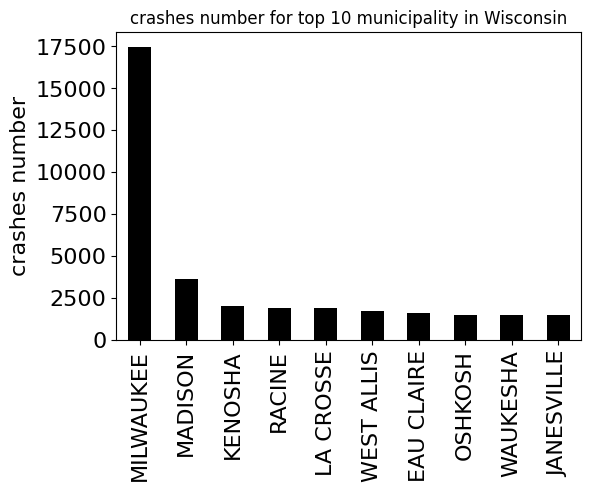

In [171]:
ax = pandas.Series(top_10_muni).plot.bar(color="black", fontsize=16, figsize=(4 + len(top_10_muni)//4, 4),title = "crashes number for top 10 municipality in Wisconsin")
ax.set_ylabel("crashes number", fontsize=16)

# Find statistics for ntfyhour and analyze the value

find min, max, mean and median vlaue for ntfyhour to see the enformcement agency respond time

**Q4 find the mean, max, and min value for the one hour range in which the enformcement agency was notified of the crash listed in military time**

In [172]:
ntfyHour = crash_dic['ntfyhour'] #make a list to store the ntfyhour

mean_ntfyHour = (sum(ntfyHour)/len(ntfyHour)) #mean value of the time
mean_ntfyHour = float("{:.2f}".format(mean_ntfyHour)) #format to be two decimal
max_ntfyHour = max(ntfyHour) # max value of time
min_ntfyHour = min(ntfyHour) #min value of time
print("The mean time is {}, the max time is {}, and the min time is {} ".format(mean_ntfyHour, max_ntfyHour,min_ntfyHour))

The mean time is 13.08, the max time is 23, and the min time is 0 


**Q5 find the median value of the ntfyHour**

In [173]:
ntfyHour = sorted(ntfyHour)
median_ntfyHour = None

if len(ntfyHour)%2 == 1: #check if the length is odd number
    median_ntfyHour = ntfyHour[floor(len(ntfyHour)/2)]
else:
    median_ntfyHour = ntfyHour[len(ntfyHour)//2]
    median_ntfyHour += ntfyHour[(len(ntfyHour)//2)-1]
    median_ntfyHour = median_ntfyHour/2
median_ntfyHour

14.0

# Date Time
analyze crash data based on the date the crashes happen

1.plot the total crashes each month

2.Find the month with max total crashes and month with min total crashes

In [174]:
#Date to time
#helper function to extract year, month, and day from 'mm/dd/yyyy' format
def get_year(date):
    """get_year(date) returns the year when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[2])

def get_day(date):
    """get_year(date) returns the day when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[1])

def get_month(date):
    """get_year(date) returns the month when the date is the in the 'mm/dd/yyyy' format"""
    date = date.split("/")
    return int(date[0])

**Q6 store the value of crashes data for each month in dictionary
Key will be the month and the value will be the number of total crashes that month**

In [175]:
def monthCode(month):
    #transfer number to January, February, March, April,
    #May, June, July, August, September, October, November, and December
    index = decode_data['Number'].index(month)
    return decode_data['Month'][index]

In [176]:
month_dic = {} #month dictionary

for i in crash_dic['crashdate']:
    month = monthCode(get_month(i))
    if month not in month_dic:
        month_dic[month] = 1
    else:
        month_dic[month] += 1
month_dic = dict(sorted(month_dic.items(), key=lambda item: item[1],reverse = True))
month_dic

{'December': 13443,
 'November': 13382,
 'October': 11715,
 'January': 11459,
 'June': 10687,
 'September': 10318,
 'May': 10056,
 'February': 10015,
 'July': 9877,
 'August': 9857,
 'March': 9232,
 'April': 8789}

**Q7 Sort the dictionary by the number of crash data and plot the value**

Text(0, 0.5, 'crashes number')

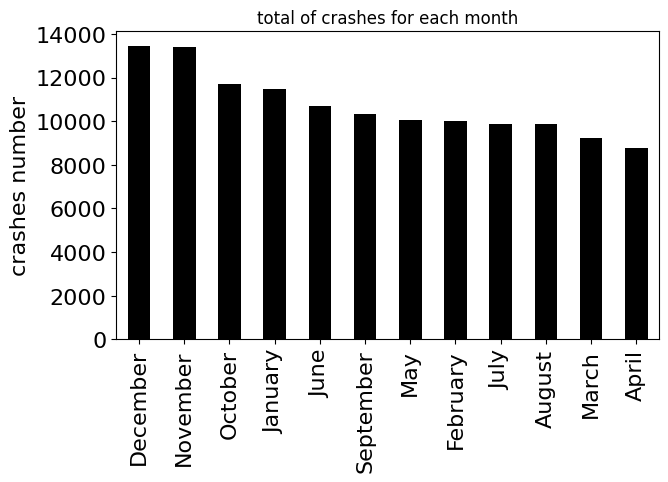

In [177]:
#sort the month dictionary by its value
month_statistic = dict(sorted(month_dic.items(), key=lambda item: item[1],reverse = True))
ax = pandas.Series(month_statistic).plot.bar(color="black", fontsize=16, figsize=(4 + len(month_statistic)//4, 4),title = "total of crashes for each month")
ax.set_ylabel("crashes number", fontsize=16)

**Q8 Find the months that has max and min crashes**

In [178]:
max_month = max(month_dic.items(), key=lambda item: item[1]) # max value of time
min_month = min(month_dic.items(), key=lambda item: item[1]) #min value of time
print("The month with maximum crashes is {}, the number of crashes is {} ".format(max_month[0],max_month[1]))
print("The month with minimum crashes is {}, the number of crashes is {} ".format(min_month[0],min_month[1]))

The month with maximum crashes is December, the number of crashes is 13443 
The month with minimum crashes is April, the number of crashes is 8789 


# Analyze the number of crashes for Madison
 find out the number of crashes  for each month in Madison municipality

 find out the number of crashes for each day in Madison municipality


**Q9 Create a dictionary that only have the crash data for Madison munipality for each month
Key is the month, and the value is the number of crashes in Madison munipality in that month**

In [179]:
crash_month_Madison = {}
current_month = None
current_muni = None

for i in range(len(crash_dic['muniname'])):
    if(crash_dic['muniname'][i] == "MADISON"):
        current_month = monthCode(get_month(crash_dic['crashdate'][i]))
        if current_month not in crash_month_Madison:
            crash_month_Madison[current_month] = 1
        else:
            crash_month_Madison[current_month] += 1

crash_month_Madison

{'July': 315,
 'November': 330,
 'December': 375,
 'January': 278,
 'February': 270,
 'March': 271,
 'June': 281,
 'October': 318,
 'August': 339,
 'April': 266,
 'May': 294,
 'September': 321}

**Q10 Create a dictionary that only have the crash data for Madison munipality for each day
Key is the day, and the value is the number of crashes in Madison munipality in that day**

In [180]:
crash_day_Madison = {}
current_day = None
current_muni = None

for i in range(len(crash_dic['muniname'])):
    if(crash_dic['muniname'][i] == "MADISON"):
        current_day = get_day(crash_dic['crashdate'][i])
        if current_day not in crash_day_Madison:
            crash_day_Madison[current_day] = 1
        else:
            crash_day_Madison[current_day] += 1

crash_day_Madison

{16: 117,
 22: 141,
 15: 159,
 10: 93,
 23: 147,
 28: 126,
 7: 136,
 25: 111,
 9: 126,
 5: 117,
 11: 102,
 3: 113,
 8: 116,
 20: 122,
 19: 143,
 14: 115,
 2: 100,
 21: 113,
 29: 122,
 26: 108,
 1: 116,
 4: 94,
 12: 117,
 6: 113,
 30: 95,
 18: 115,
 17: 116,
 27: 126,
 24: 147,
 13: 115,
 31: 77}

# Analyze the location where crashes happened.
Abbreviation for LOCTYPE:

I- Intersection(public roadway)

N – Non-intersection (public roadway)

PL – Parking lot

PP – Private Property

**Q11 Find out which type of location had the most crashes in 2022 and how many crashes happened
in that location**

In [181]:
#loc_type_decode
def loc_type_decode(loc):
    if loc not in decode_data['Loctype']:
        return "Unknown type"
    index = decode_data['Loctype'].index(loc)
    return decode_data['LoctypeWord'][index]

In [182]:
loc_type = {}
count = 0
for i in crash_dic['loctype']:
    i = loc_type_decode(i)
    if i not in loc_type:
        loc_type[i] = 1
    else:
        loc_type[i] += 1
max_type = max(sorted(loc_type.items()), key = lambda t:t[1])
max_type

('Non-intersection(public roadway) ', 76391)

In [183]:
def cell(row_idx, col_name):
    col_idx = title.index(col_name)
    val = data[row_idx][col_idx]

    if val.strip() == "":
        return None
    if col_name in ["LATDECDG", "LONDECDG"]:
        try:
            val = float(val)
        except ValueError:
            print(f"Warning: Unable to convert {col_name} value '{val}' to float at row {row_idx}.")
            return None

    return val


**Q12 What is the latitude of the 572th crash?**

In [184]:
print(cell(572,'LATDECDG'))

43.114408168


**Q13 Create a dataframe for the precise location of crashes with lattitude and longitude**

In [185]:
crash_lat = {}
crash_lon = {}
for i in range(len(data)):
    if cell(i,'LATDECDG') == None or cell(i,'LONDECDG') == None:
        continue
    else:
        crash_lat[i] = cell(i,'LATDECDG')
        crash_lon[i] = cell(i,'LONDECDG')
crash_lat = pandas.Series(crash_lat)
crash_lon = pandas.Series(crash_lon)
df = DataFrame({'Lattitude':crash_lat,'Longitude':crash_lon})
df

,Lattitude,Longitude
0,43.037016,-89.390930
2,43.035365,-89.432469
4,43.072505,-89.404078
5,43.075306,-89.450823
6,43.047481,-89.473558
...,...,...
128825,45.451201,-92.551061
128826,45.451698,-92.570094
128827,45.453313,-92.461417
128828,45.452236,-92.550408


**Q14 Generate the scatter plot of the locations**

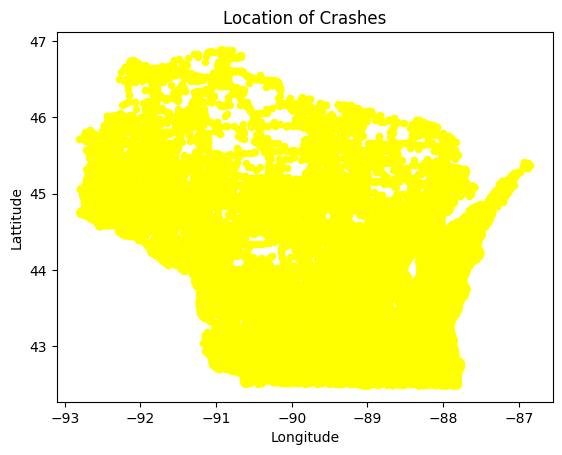

In [186]:
ax = df.plot.scatter(x = 'Longitude', y = 'Lattitude',color = 'yellow')
ax.set_title('Location of Crashes')
None

**Q15 What are the types of roads that crashes took place? And which type of road had the most crashes?**

In [187]:
#decode hwyclass type:
def hwyclass_decode(hwyclass):
    index = decode_data['Hwyclass'].index(hwyclass)
    return decode_data['HwyclassWord'][index]

In [188]:
road_type = []
for i in range(len(data)):
    road_type.append(hwyclass_decode(data[i][title.index('HWYCLASS')]))
road_type = list(set(road_type))
road_type

['County Trunk Urban',
 'Town Road Rural',
 'State Highway Urban',
 'County Trunk Rural',
 'Interstate Hwy Urban',
 'Interstate Hwy Rural',
 'State Highway Rural',
 'City Street Rural',
 'City Street Urban ']

In [189]:
road_type_count = {}

for i in range(len(data)):
    hwyclass_value = hwyclass_decode(data[i][title.index('HWYCLASS')])

    if hwyclass_value not in road_type_count:
        road_type_count[hwyclass_value] = 1
    else:
        road_type_count[hwyclass_value] += 1
largest_road_type = max(road_type_count, key=road_type_count.get)
largest_road_type

'City Street Urban '

# Analyze the injury

**Q16 What are the levels of injury severity and how many are they?**

In [190]:
#decode injury level
def injury_level(injury):
    index = decode_data['Injury'].index(injury)
    return decode_data['InjuryWord'][index]

In [191]:
injury_severity = []
for i in range(len(data)):
    injury_severity.append(injury_level(data[i][title.index('INJSVR')]))
injury_severity = list(set(injury_severity))
injury_severity

['Possible Injury ',
 'No Apparent Injury ',
 'Suspected Serious Injury ',
 'Fatal Injury ',
 'Suspected Minor Injury ']

In [192]:
injury_severity_count = {}

for i in range(len(data)):
    injury_value = injury_level(data[i][title.index('INJSVR')])

    if injury_value not in injury_severity_count:
        injury_severity_count[injury_value] = 1
    else:
        injury_severity_count[injury_value] += 1
largest_injury_severity = max(injury_severity_count, key=injury_severity_count.get)
injury_severity_count

{'Possible Injury ': 10938,
 'No Apparent Injury ': 103212,
 'Suspected Minor Injury ': 11393,
 'Suspected Serious Injury ': 2740,
 'Fatal Injury ': 547}

**Q17 Generate a bar plot for injury severity**

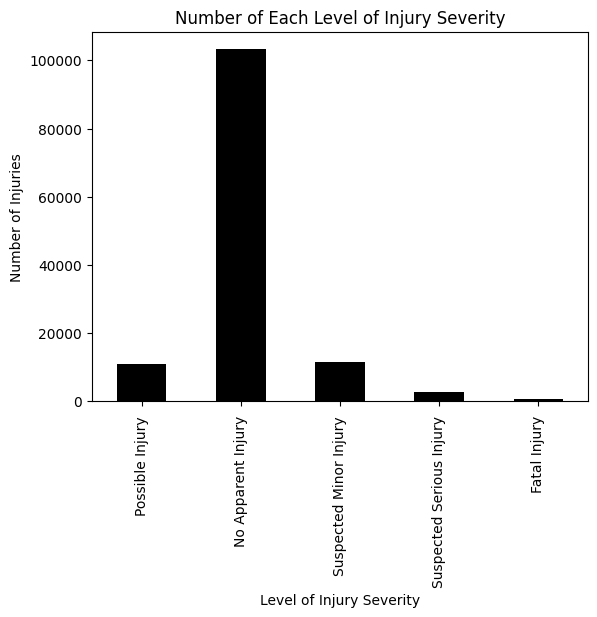

In [193]:
s = pandas.Series(injury_severity_count)
ax = s.plot.bar(color = 'k')
ax.set_ylabel('Number of Injuries')
ax.set_xlabel('Level of Injury Severity')
ax.set_title('Number of Each Level of Injury Severity')
None

**Q18 How many veh involved in the crashes in 2022 in WI? And what is the average number of vehicles involed in crashes per county?**

In [194]:
count = 0
for i in range(len(data)):
    count += int(data[i][title.index('TOTVEH')])
print("total crashes happened in Wisconsin state in 2022 is",count)
county_num = []
for i in range(len(data)):
    if data[i][title.index('CNTYNAME')] not in county_num:
        county_num.append(data[i][title.index('CNTYNAME')])
avg_veh_per_county = count / len(county_num)
print("average crashes happen in each county in 2022 in WI state is:",avg_veh_per_county)

total crashes happened in Wisconsin state in 2022 is 214109
average crashes happen in each county in 2022 in WI state is: 2973.7361111111113


**Q19 Alcohol is one of the most severe factor that causes crashes, how many crashes involved with alcohol? What is average crahsed invovled with alcohol per county?**

In [195]:
alcohol_count = 0
for i in range(len(data)):
    if data[i][title.index('ALCFLAG')] == 'Y':
        alcohol_count += 1
print("crashes involved alcohol is: ",alcohol_count)
print("percentage of crashes involved alcohol is:",(alcohol_count/count)*100,"%")
county_num = []
for i in range(len(data)):
    if data[i][title.index('CNTYNAME')] not in county_num:
        county_num.append(data[i][title.index('CNTYNAME')])
avg_alco_per_county = alcohol_count / len(county_num)
print("average crashed involved with alcohol per county is:",avg_alco_per_county)

crashes involved alcohol is:  6230
percentage of crashes involved alcohol is: 2.909732893059143 %
average crashed involved with alcohol per county is: 86.52777777777777


**Q20 Generate a bar plot of crashes involved with alcohol for each county**

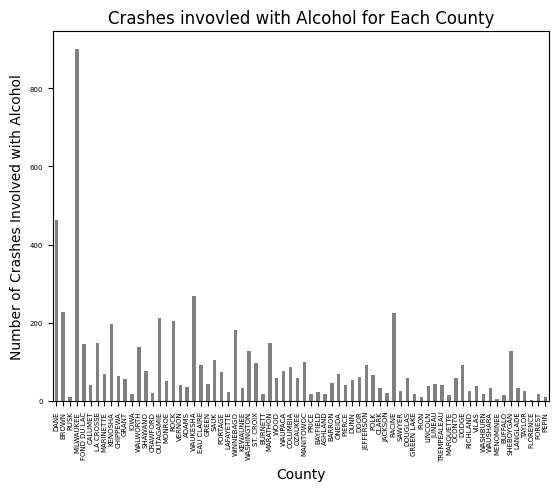

In [196]:
county_alco = {}
for i in range(len(data)):
    if data[i][title.index('ALCFLAG')] == 'Y':
        if data[i][title.index('CNTYNAME')] not in county_alco:
            county_alco[data[i][title.index('CNTYNAME')]] = 1
        else:
            county_alco[data[i][title.index('CNTYNAME')]] += 1
s = pandas.Series(county_alco)
ax = s.plot.bar(color = 'grey',fontsize = 5 )
ax.set_ylabel('Number of Crashes Involved with Alcohol')
ax.set_xlabel('County')
ax.set_title('Crashes invovled with Alcohol for Each County')
None

# Scatter Plot with injury and notification hour

In [197]:
import plotly.express as px
import pandas as pd

crash_df = pd.DataFrame(crash_dic)

# Clean data again for safety
plot_data = crash_df.dropna(subset=['ntfyhour', 'total_injury', 'injury_severity'])
plot_data['total_injury'] = pd.to_numeric(plot_data['total_injury'], errors='coerce')

# Plot
fig = px.scatter(
    plot_data,
    x='ntfyhour',
    y='total_injury',
    color='injury_severity',
    hover_data=['alcohol', 'speed'],
    title='Interactive Scatter Plot: Injuries vs. Notification Hour',
    labels={'ntfyhour': 'Notification Hour', 'total_injury': 'Total Injuries'}
)

fig.show()


This interactive scatter plot visualizes the relationship between crash notification time and the number of injuries, with points colored by injury severity and hoverable crash details including alcohol and speed involvement.

# Statistical Tests for Crash Data

## Q1. Chi-square test
Is there a relationship between alcohol involvement and injury severity?

In [198]:
from scipy.stats import chi2_contingency



# convert alcohol flag to binary: Y for 1, missing/other for 0
crash_df['alcohol'] = crash_df['alcohol'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)
contingency_table = pd.crosstab(crash_df['injury_severity'], crash_df['alcohol'])


# Crosstab table (contingency table)
contingency_table = pd.crosstab(crash_df['injury_severity'], crash_df['alcohol'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Show results
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
print("\nContingency Table:")
print(contingency_table)




Chi-square statistic: 2959.907444292026
Degrees of freedom: 4
P-value: 0.0

Contingency Table:
alcohol              0     1
injury_severity             
A                 2189   551
B                10236  1157
C                10336   602
K                  403   144
O                99436  3776


Summary: The chi-square test shows a significant association between alcohol involvement and injury severity (χ² = 2959.91, p < 0.001),
indicating that crashes involving alcohol are more likely to result in severe injuries.

## Q2. T-test
Do crashes involving speeding have a different average number of injuries than those that don’t?

In [199]:
from scipy.stats import ttest_ind

# Convert speedflag to binary (1 = speeding involved, 0 = not)
crash_df['speed'] = crash_df['speed'].apply(lambda x: 1 if str(x).strip().upper() == 'Y' else 0)

# Convert total_injury to numeric (some values might be strings)
crash_df['total_injury'] = pd.to_numeric(crash_df['total_injury'], errors='coerce')

# Drop rows with missing injury data
crash_df_clean = crash_df.dropna(subset=['total_injury'])

# Split into two groups
injuries_with_speed = crash_df_clean[crash_df_clean['speed'] == 1]['total_injury']
injuries_without_speed = crash_df_clean[crash_df_clean['speed'] == 0]['total_injury']

# Run t-test
t_stat, p_value = ttest_ind(injuries_with_speed, injuries_without_speed, equal_var=False)

# Output
print("T-statistic:", t_stat)
print("P-value:", p_value)

print("Average injuries (speeding):", injuries_with_speed.mean())
print("Average injuries (no speeding):", injuries_without_speed.mean())


T-statistic: 21.532036802426443
P-value: 8.32648688280279e-102
Average injuries (speeding): 0.36524168762224085
Average injuries (no speeding): 0.2458827241177266


Summary: The t-test comparing the average number of injuries in crashes with and without speeding shows a statistically significant difference (t = 21.532, p < 0.05), with speeding-related crashes resulting in higher average injuries.

## Q3. ANOVA
Does the notification hour differ significantly by injury severity class?

In [200]:
from scipy.stats import f_oneway

# Drop missing values
crash_df_clean = crash_df.dropna(subset=['ntfyhour', 'injury_severity'])

# Group data by each injury level
group_A = crash_df_clean[crash_df_clean['injury_severity'] == 'A']['ntfyhour']
group_B = crash_df_clean[crash_df_clean['injury_severity'] == 'B']['ntfyhour']
group_C = crash_df_clean[crash_df_clean['injury_severity'] == 'C']['ntfyhour']
group_K = crash_df_clean[crash_df_clean['injury_severity'] == 'K']['ntfyhour']
group_O = crash_df_clean[crash_df_clean['injury_severity'] == 'O']['ntfyhour']

# Run ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C, group_K, group_O)

# Output results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# show group means
print("\nAverage Notification Hour by Injury Level:")
for label, group in zip(['A', 'B', 'C', 'K', 'O'], [group_A, group_B, group_C, group_K, group_O]):
    print(f"{label}: {group.mean():.2f}")


F-statistic: 8.810437739752063
P-value: 4.1522667755800165e-07

Average Notification Hour by Injury Level:
A: 13.39
B: 13.19
C: 13.26
K: 12.39
O: 13.05


Summary: A one-way ANOVA revealed a statistically significant difference in average notification hour across injury severity levels (F = 8.81, p < 0.001), but the actual difference in means was small, suggesting that time of notification has limited practical relevance for injury severity.



## Q4. Correlation
How strongly is total injury count correlated with notification hour,speed and alcohol

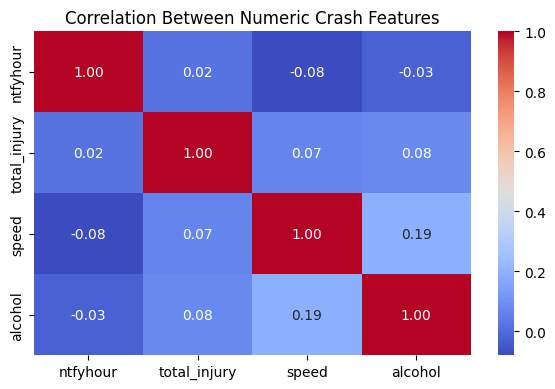

              ntfyhour  total_injury     speed   alcohol
ntfyhour      1.000000      0.020636 -0.079224 -0.025478
total_injury  0.020636      1.000000  0.066117  0.079564
speed        -0.079224      0.066117  1.000000  0.194142
alcohol      -0.025478      0.079564  0.194142  1.000000


In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation
numeric_cols = ['ntfyhour', 'total_injury', 'speed', 'alcohol']

# Clean and convert columns to numeric
crash_df_corr = crash_df[numeric_cols].copy()
crash_df_corr = crash_df_corr.apply(pd.to_numeric, errors='coerce')
crash_df_corr = crash_df_corr.dropna()

# Compute correlation matrix
corr_matrix = crash_df_corr.corr()

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Crash Features')
plt.tight_layout()
plt.show()
print(corr_matrix)



Summary: Correlation analysis reveals weak relationships between numeric crash features. Surprisingly, speeding shows a slight negative correlation with crash notification hour, suggesting more speeding crashes may occur earlier in the day — though the effect is minimal.


# Summary for statistical analysis:
This statistical analysis explored the relationships between crash factors and injury severity in Wisconsin's 2022 vehicle crash data. Using chi-square, t-tests, ANOVA, and correlation, this project identified significant associations between alcohol, speeding, and injury outcomes. While some patterns were statistically significant, their real-world effect sizes were modest — reflecting the complex, multicausal nature of crash events in a large-scale dataset.
